# 「ベイズ推論による機械学習入門」P.68 ウィシャート分布

### ウィシャート分布

2次元ウィシャート分布からサンプルされた精度行列を使って2次元ガウス分布を生成する。

### Distributions.ji を使ったやり方

In [4]:
using Distributions
using Plots

In [5]:
ν =　5.0
W = [
    2.0 0.0
    0.0 2.0
]

μ = zeros(2)
wis = Wishart(ν, W)
Σ = rand(wis)
gd = MvNormal(μ, Σ)

FullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [12.828459315995614 1.7038633679012956; 1.7038633679012956 6.914689846333717]
)


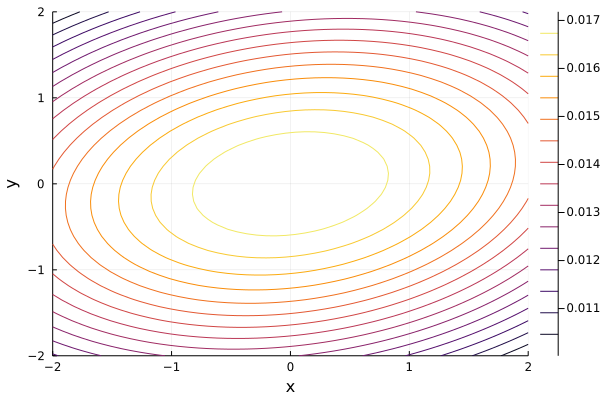

In [6]:
xs = range(-2, 2, length=50)
ys = range(-2, 2, length=50)
contour(xs, ys, (x, y) -> pdf(gd, [x, y]))
plot!(xlabel="x", ylabel="y")